In [46]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11188082281998597270]

In [47]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [48]:
# from keras.applications.vgg16 import VGG16

In [49]:
### 실습. fashion_mnist 데이터를 활용하여 신경망구조를 생성하고 훈련시켜보세요
### keras.datasets.fashion_mnist.load_data()

In [50]:
import os
import cv2
# 케라스 모델 생성 라이브러리
import keras
from keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from keras import layers

# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# 미리 섞여진 fashoin-mnist 의 학습 데이터와 테스트 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 1 Trouser


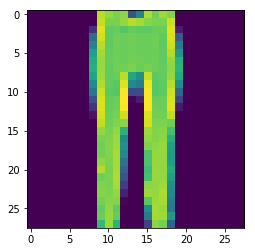

In [52]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습 셋과 테스트 셋의 데이터 개수
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2 
                        "Dress",        # 인덱스 3 
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6 
                        "Sneaker",      # 인덱스 7 
                        "Bag",          # 인덱스 8 
                        "Ankle boot"]   # 인덱스 9

# 이미지 인덱스, 0에서 59,999 사이의 숫자를 선택할 수 있습니다.
img_index = 106

# y_train 은 에서 9까지의 레이블 포함합니다.
label_index = y_train[img_index]
# 레이블 출력해 봅니다. 예를들어 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# 학습 데이터 중에서 이미지 한 장을 보여줍니다.
plt.imshow(x_train[img_index])

In [53]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [54]:
# # 입력 이미지의 크기를 (28, 28) 에서 (28, 28, 1) 로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(len(x_train), w, h,1 )
x_test = x_test.reshape(len(x_test), w, h,1)

In [55]:
# 레이블에 원-핫 인코딩 적용 
# 원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [56]:
y_train.shape

(60000, 10)

In [57]:
# 학습 셋 크기
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습용, 검증용, 테스트용 데이터셋의 개수
print(x_train.shape[0], 'train set')
# print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28, 1) y_train shape: (60000, 10)
60000 train set
10000 test set


### CNN 모델

In [58]:
import warnings

warnings.filterwarnings(action="ignore")

In [59]:
from keras import Sequential
from keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense

In [60]:
modelDim = x_train[0].shape

model = keras.Sequential()
# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Conv2D(filters=32, kernel_size=2, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=modelDim)) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

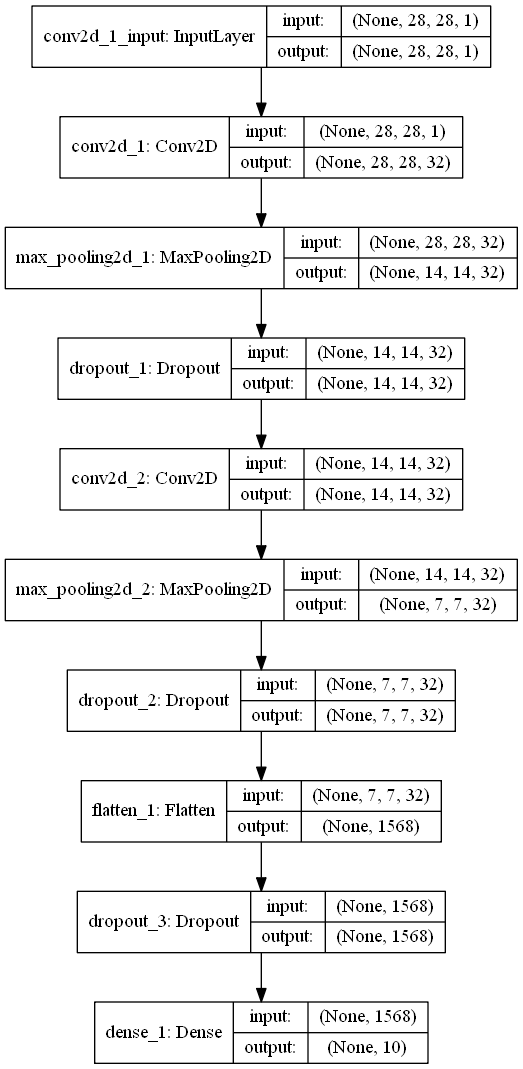

In [61]:
from keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image("model_plot.png", retina=True)


In [62]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [63]:
from datetime import datetime

now = datetime.now()
currdate = now.strftime("%Y_%m_%d_%H_%M")

In [64]:
import time
save_dir = "./logs{}".format(currdate)

callbacks = [
    
    keras.callbacks.TensorBoard(
    log_dir = save_dir,
    write_graph=True,
    write_images=True),
    
    keras.callbacks.EarlyStopping(
    monitor = 'val_acc', patience=10,
    )
]

#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=5,
         validation_split=0.2,
         callbacks=callbacks
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 30s 619us/step - loss: 0.6948 - accuracy: 0.7465 - val_loss: 0.4476 - val_accuracy: 0.8437
Epoch 2/5
48000/48000 [==============================] - 31s 636us/step - loss: 0.5027 - accuracy: 0.8181 - val_loss: 0.4162 - val_accuracy: 0.8543
Epoch 3/5
48000/48000 [==============================] - 30s 632us/step - loss: 0.4637 - accuracy: 0.8343 - val_loss: 0.3954 - val_accuracy: 0.8553
Epoch 4/5
48000/48000 [==============================] - 30s 628us/step - loss: 0.4432 - accuracy: 0.8418 - val_loss: 0.3700 - val_accuracy: 0.8688
Epoch 5/5
48000/48000 [==============================] - 30s 630us/step - loss: 0.4227 - accuracy: 0.8484 - val_loss: 0.3525 - val_accuracy: 0.8747


### 모델 추론

In [65]:
# verbose: 정보표시 레벨 (0,1)
test_loss, test_acc = model.evaluate(x_test, 
                                     y_test,
                                     verbose=1)
print(test_loss, test_acc)


10000/10000 [==============================] - 2s 158us/step
0.3626865385532379 0.8756999969482422


In [66]:
x_test.shape

(10000, 28, 28, 1)

In [67]:
imgfile = "../images/"

In [68]:
testImg = x_test[190]

In [69]:
y_test[190]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [70]:
testImg2 = testImg *255

In [71]:
test99 = testImg2.reshape(28,28)

In [72]:
import pandas as pd
pd.DataFrame(test99).to_csv("./test99.csv")

In [73]:
cv2.imwrite("./test.jpg", testImg2)

True

In [74]:
testimg3 = testImg2.reshape(28,28)

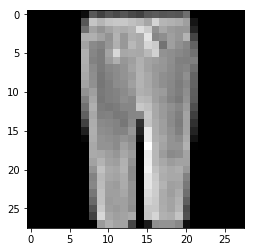

In [75]:
plt.imshow(testimg3, cmap="gray")

In [76]:
len(testImg)

28

In [77]:
testimg4 =  testimg3/255

In [78]:
testimg4.shape

(28, 28)

In [79]:
testimg5 = testimg4.reshape(1,28,28,1)

In [80]:
# 예측 수행
test_predictions = model.predict(testimg5)
test_predictions

array([[5.23579540e-04, 9.92212713e-01, 1.06213497e-06, 1.88623881e-03,
        4.24887473e-03, 5.31265298e-09, 1.11274025e-03, 4.10016687e-09,
        1.46610355e-05, 1.48054244e-08]], dtype=float32)

In [81]:
result = fashion_mnist_labels[np.argmax(test_predictions)]
result

'Trouser'

In [82]:
# 예측 수행
test_predictions = model.predict(x_test)
test_predictions

array([[1.05052186e-05, 1.42056524e-06, 2.96649087e-05, ...,
        1.09969445e-01, 3.71566112e-03, 8.67936313e-01],
       [1.46594699e-04, 7.08140362e-07, 9.92080748e-01, ...,
        1.48822825e-14, 4.04796083e-06, 4.04180744e-10],
       [1.02273987e-06, 9.99988198e-01, 7.30524752e-09, ...,
        2.72310341e-10, 4.04432598e-07, 5.61729052e-10],
       ...,
       [1.03768790e-02, 4.83967551e-06, 1.61939161e-03, ...,
        4.21982713e-06, 9.73243654e-01, 1.58761850e-06],
       [5.99806015e-07, 9.99861360e-01, 9.01020480e-10, ...,
        2.68757083e-09, 6.95635151e-07, 1.25823743e-08],
       [2.30508018e-03, 2.57903885e-04, 7.04171276e-03, ...,
        3.06659967e-01, 9.22027826e-02, 1.18757254e-02]], dtype=float32)

In [83]:
inverse_test= x_test.reshape(len(x_test), 28, 28)

In [84]:
inverse_test = inverse_test*255

In [85]:
inverse_test.shape

(10000, 28, 28)

In [86]:
test_predictions.shape

(10000, 10)

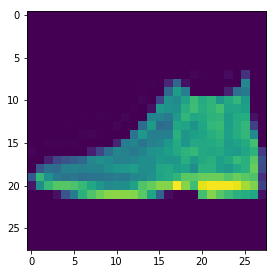

In [87]:
plt.figure(figsize=(30, 20)) 
plt.subplot(2, 6, 0+1) 
plt.imshow(inverse_test[0:][0]) 

### [실습] 결과 시각화

### [실습] 심화 응용 따라하기 하단의 cnn 따라하기 내용을 실습한 후 결과를 도출 후 haiteam@kopo.ac.kr 메일로 전송